# Unidade 1 - Introdução à Regressão

Os alunos receberão uma base de dados com informações sobre veículos e seus respectivos preços de mercado. A base consta com diferentes informações de características dos veículos, tais como: modelo, tipo de combustível, número de portas, etc. O aluno deverá se organizar a fim de conseguir encontrar um modelo de regressão que preveja o preço de um veículo dadas as suas características.

Os alunos têm total liberdade para escolher quais modelos consideram mais coerentes para a resolução do problema, bem como a criação de novas covariáveis de acordo com as informações disponíveis e a avaliação dos modelos.

É importante deixar claro quais covariáveis estão sendo utilizadas, se houve criação de novas covariáveis e qual foi o processo adotado, além de clareza de quais foram os modelos escolhidos para serem testados e qual foi o critério de comparação de modelos.

## Entrega:

Ao término da atividade, o projeto deve ser submetido no ambiente de ensino um arquivo compactado, nomeado como iml1-at1-<sobrenome>.zip, com o seguinte conteúdo:

- Pasta do projeto desenvolvido com o respectivo código fonte e/ou notebook da solução;

- O código fonte deve conter todos os testes de modelos que o aluno desejar avaliar, bem como foi feita sua avaliação

- No final, deve haver um sessão com o modelo selecionado de acordo com os critérios adotados pelo aluno realizando a previsão para o novo usuário

- Caso o aluno se sinta confortável, tem total liberdade para comentar o código e colocar suas observações e conclusões


In [1]:
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV

from sklearn.linear_model import ARDRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', ConvergenceWarning)

# 📕 Fonte de dados

In [5]:
# Local da base de dados
URL = 'https://raw.githubusercontent.com/chaua/mba-machine-learning/main/iml1/atividade1/base-veiculos.csv'

# Carrega a base em um dataframe
df = pd.read_csv(URL)

# 📕 Exploração dos dados

In [6]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exibe os tipos de dados de todas as colunas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Exibe o domínio dos valores categóricos

- Colunas `doornumbers` e `cylindernumber` podem ser convertidos para números
- Coluna `name` pode ser separada pela `marca` e `modelo` do veículo

In [9]:
pd.Series({col:df[col].unique() for col in df.select_dtypes(exclude=['float64', 'int64'])})

name              [alfa-romero giulia, alfa-romero stelvio, alfa...
fueltypes                                             [gas, diesel]
aspiration                                             [std, turbo]
doornumbers                                             [two, four]
carbody             [convertible, hatchback, sedan, wagon, hardtop]
drivewheels                                         [rwd, fwd, 4wd]
enginelocation                                        [front, rear]
enginetype                 [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
cylindernumber         [four, six, five, three, twelve, two, eight]
fuelsystem           [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]
dtype: object

## Análise do nome do veículo

- Alguns campos possuem erro de digitação
- Cada modelo do veículo possui poucos exemplos na base - assumiremos que os outros atributos é que definem cada modelo

In [10]:
df.name.value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

## Análise da marca dos veículos

In [11]:
df.apply(lambda row: row['name'].split(' ')[0], axis=1).value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
dtype: int64

## Plotagem de todos os atributos numéricos

In [12]:
df.corr()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


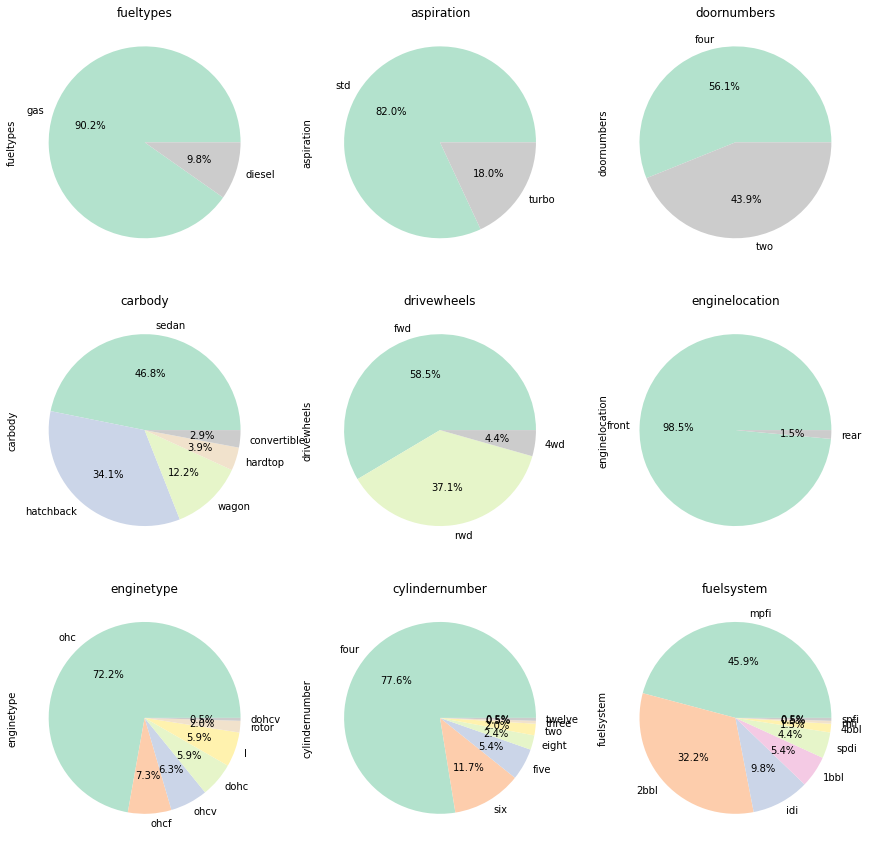

In [13]:
colunas = ('fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 
           'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',)

fig, axes = plt.subplots(3, 3)
for ax, col in zip(axes.ravel(), colunas):
    df[col].value_counts().plot(ax=ax, kind='pie', colormap='Pastel2', figsize=(15, 15), fontsize=10, autopct='%1.1f%%')
    ax.set_title(str(col), fontsize=12)
plt.show()    

# 📕 Limpeza dos dados

In [14]:
df1 = df.copy()

## Linhas que não possuem dados

In [15]:
df1[df1.isnull().any(axis=1)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Extrai a marca do veículo e corrige os nomes incorretos

In [16]:
def get_marca(row):
    marca = row['name'].split(' ')[0].lower().strip()
    
    if marca == 'toyouta':
        return 'toyota'
    elif marca in ('vokswagen', 'vw'):
        return 'volkswagen'
    elif marca == 'porcshce':
        return 'porsche'
    elif marca == 'maxda':
        return 'mazda'
    
    return marca

marca = df1.apply(lambda row: get_marca(row), axis=1)
print(marca.value_counts())

df1['marca'] = marca

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
dtype: int64


## Traduz os campos numéricos para números

In [17]:
# Colunas `doornumbers` e `cylindernumber` podem ser convertidos para números
traducao = {
    'doornumbers': {
        'two': 2,
        'four': 4,
    },

    'cylindernumber': {
        'two': 2,
        'three': 3,
        'four': 4,
        'five': 5,
        'six': 6,
        'eight': 8,
        'twelve': 12,
    },
}

df2 = df1.replace(traducao)
df2.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,marca
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Traduz os campos categóricos para números

In [18]:
colunas = ['fueltypes', 'aspiration', 'carbody', 'drivewheels', 
           'enginelocation', 'enginetype', 'fuelsystem', 'marca',]

df3 = pd.get_dummies(df2, columns=colunas)
df3.head()

,ID,symboling,name,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltypes_diesel,fueltypes_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheels_4wd,drivewheels_fwd,drivewheels_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,marca_alfa-romero,marca_audi,marca_bmw,marca_buick,marca_chevrolet,marca_dodge,marca_honda,marca_isuzu,marca_jaguar,marca_mazda,marca_mercury,marca_mitsubishi,marca_nissan,marca_peugeot,marca_plymouth,marca_porsche,marca_renault,marca_saab,marca_subaru,marca_toyota,marca_volkswagen,marca_volvo
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Remove as colunas inúteis

In [19]:
colunas = ['ID', 'symboling', 'name']
df4 = df3.drop(columns=colunas)
df4.head()

,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltypes_diesel,fueltypes_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheels_4wd,drivewheels_fwd,drivewheels_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,marca_alfa-romero,marca_audi,marca_bmw,marca_buick,marca_chevrolet,marca_dodge,marca_honda,marca_isuzu,marca_jaguar,marca_mazda,marca_mercury,marca_mitsubishi,marca_nissan,marca_peugeot,marca_plymouth,marca_porsche,marca_renault,marca_saab,marca_subaru,marca_toyota,marca_volkswagen,marca_volvo
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 📕 Normalização

## Normaliza todos os dados numéricos

In [20]:
colunas = ['doornumbers', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
           'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio',
           'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']

df5 = df4[colunas].copy()
df5.head()

,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


In [21]:
# Utiliza o StandardScaler
scaler = preprocessing.StandardScaler()

df6 = pd.DataFrame(scaler.fit_transform(df5), columns=df5.columns)
df6.head()

,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [22]:
# Reagrupa os campos normalizados no dataset original
df7 = df4.copy()

df7.drop(labels=df6.columns, axis=1, inplace=True)
df7[df6.columns] = df6

df7.head()

,price,fueltypes_diesel,fueltypes_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheels_4wd,drivewheels_fwd,drivewheels_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,marca_alfa-romero,marca_audi,marca_bmw,marca_buick,marca_chevrolet,marca_dodge,marca_honda,marca_isuzu,marca_jaguar,marca_mazda,marca_mercury,marca_mitsubishi,marca_nissan,marca_peugeot,marca_plymouth,marca_porsche,marca_renault,marca_saab,marca_subaru,marca_toyota,marca_volkswagen,marca_volvo,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.130388,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.130388,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.884652,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.884652,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


# 📕 Preparação dos datasets

In [23]:
# Cria os datasets X e y
X = df7.drop(['price'] , axis=1).values
y = df7['price'].values

In [24]:
# Cria os datasets de treino e teste
# - Para os experimentos será utilizado 70% treino e 30% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=8348754)

# 📕 Avaliação dos modelos

In [25]:
resultados = {}
modelos = {}

In [26]:
def avaliar_modelo(modelo):
    """Avalia o desempenho de cada modelo"""
    modelo.fit(X_treino, y_treino)

    # Avalia o desempenho do treino
    y_pred = modelo.predict(X_treino)
    
    treino_r2 = r2_score(y_treino, y_pred)
    treino_mse = mean_squared_error(y_treino, y_pred)
    
    # Avalia o desempenho do teste
    y_pred = modelo.predict(X_teste)

    teste_r2 = r2_score(y_teste, y_pred)
    teste_mse = mean_squared_error(y_teste, y_pred)
    
    print(f'TREINO: ')
    print(f'R2....: {treino_r2 * 100:0.1f}%')
    print(f'MSE...: {treino_mse}')
    print()
    print(f'TESTE: ')
    print(f'R2....: {teste_r2* 100:0.1f}%')
    print(f'MSE...: {teste_mse}')
    
    result = pd.DataFrame({"Y_teste": y_teste, "Y_pred" : y_pred})
    plt.figure(figsize=(16, 8))
    plt.plot(result)
    plt.legend(['Atual' , 'Previsto'])
    
    return (treino_r2, treino_mse, teste_r2, teste_mse)
    

## Modelo 1: Regressão Linear

TREINO: 
R2....: 95.9%
MSE...: 2662533.328014555

TESTE: 
R2....: 94.3%
MSE...: 3478819.2421953217


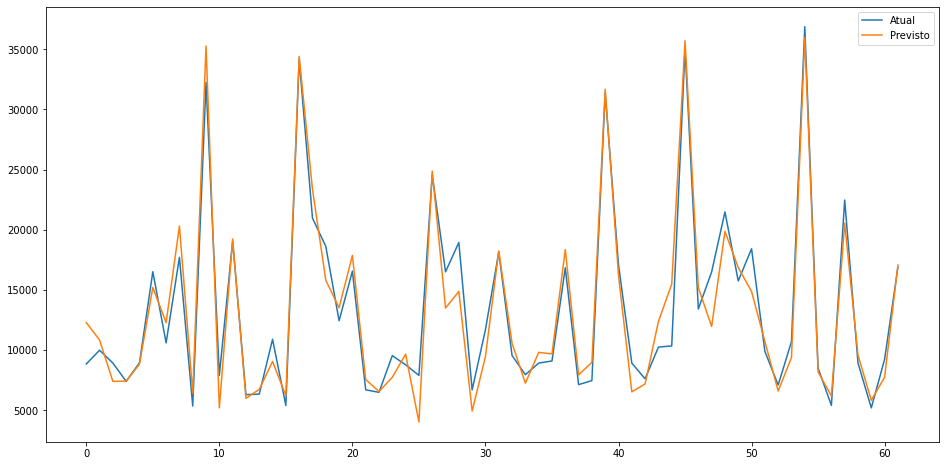

In [27]:
# Geração do modelo
modelo = LinearRegression()
resultados['LinearRegression'] = avaliar_modelo(modelo)
modelos['LinearRegression'] = modelo

## Modelo 2: Lasso

TREINO: 
R2....: 95.9%
MSE...: 2676118.5455094054

TESTE: 
R2....: 94.6%
MSE...: 3311369.1989604477


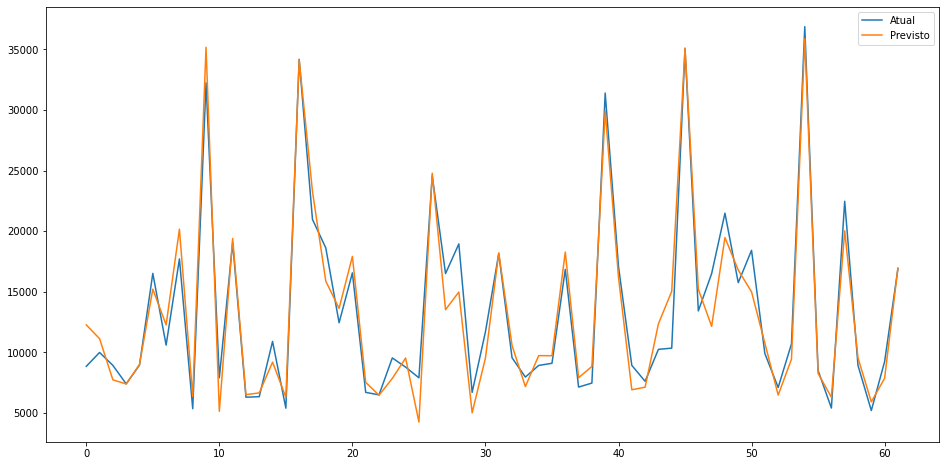

In [28]:
# Geração do modelo
modelo = Lasso(max_iter=5000)
resultados['Lasso'] = avaliar_modelo(modelo)
modelos['Lasso'] = modelo

## Modelo 3: LassoCV

TREINO: 
R2....: 93.6%
MSE...: 4124110.784005721

TESTE: 
R2....: 94.8%
MSE...: 3182138.691650557


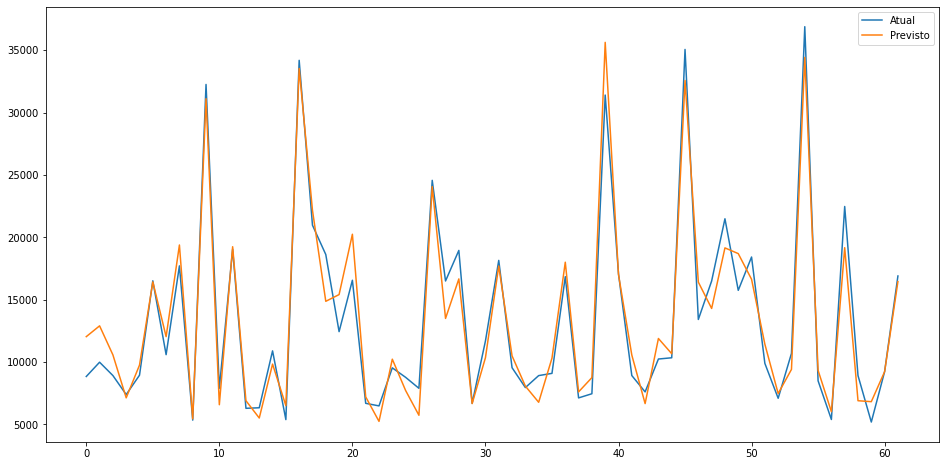

In [29]:
# Geração do modelo
modelo = LassoCV(max_iter=5000)
resultados['LassoCV'] = avaliar_modelo(modelo)
modelos['LassoCV'] = modelo

## Modelo 4: LassoLars

TREINO: 
R2....: 95.9%
MSE...: 2664198.6734314878

TESTE: 
R2....: 94.3%
MSE...: 3451193.495683244


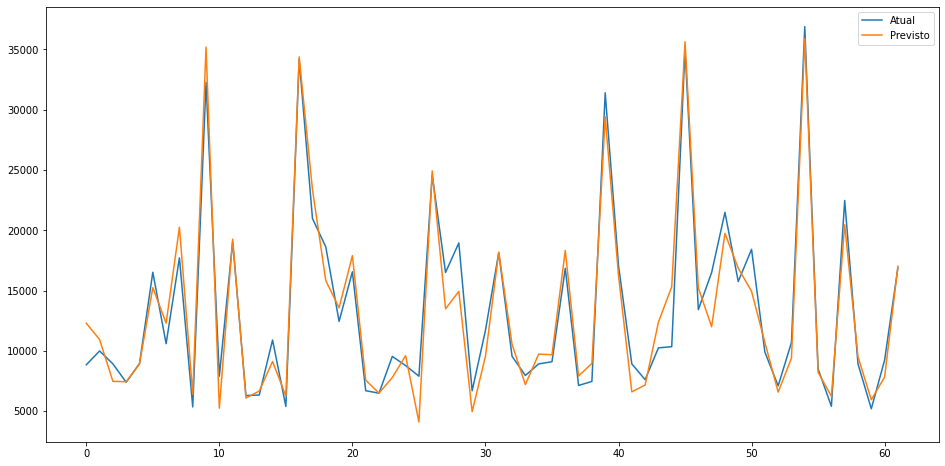

In [30]:
# Geração do modelo
modelo = make_pipeline(preprocessing.StandardScaler(with_mean=False), LassoLars(fit_intercept=False, normalize=False, max_iter=10000, eps=1e-20))
resultados['LassoLars'] = avaliar_modelo(modelo)
modelos['LassoLars'] = modelo

## Modelo 5: LassoLarsCV

TREINO: 
R2....: 93.5%
MSE...: 4184667.0001247465

TESTE: 
R2....: 95.1%
MSE...: 2978650.948626205


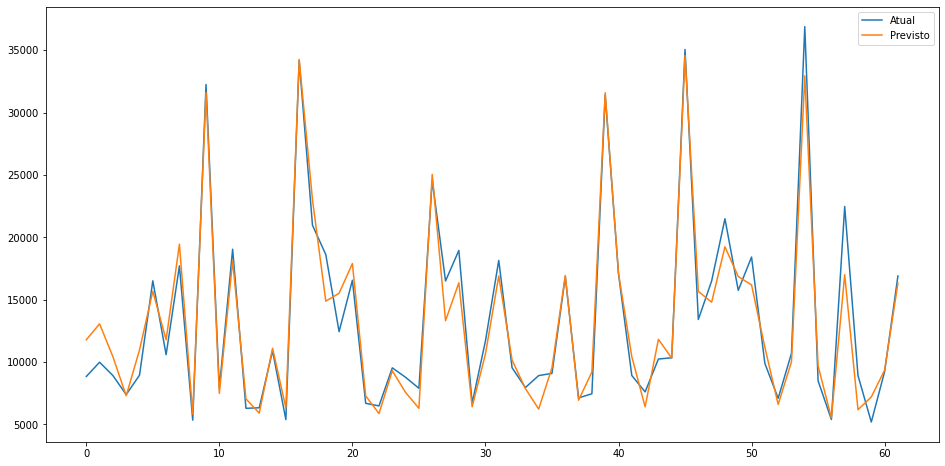

In [31]:
# Geração do modelo
modelo = make_pipeline(preprocessing.StandardScaler(with_mean=False), LassoLarsCV(fit_intercept=False, normalize=False, max_n_alphas=3000, max_iter=10000, eps=1e-20))
resultados['LassoLarsCV'] = avaliar_modelo(modelo)
modelos['LassoLarsCV'] = modelo

## Modelo 6: ARDRegression

TREINO: 
R2....: 94.4%
MSE...: 3629459.6811786196

TESTE: 
R2....: 95.2%
MSE...: 2941988.029135899


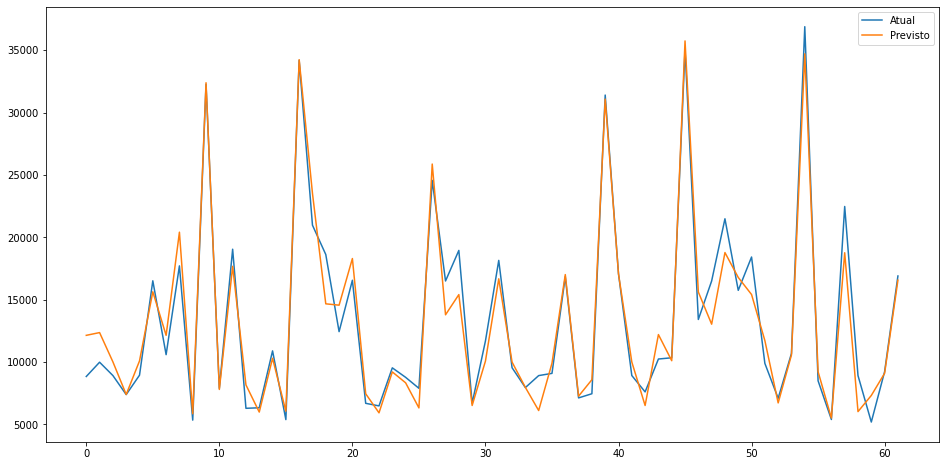

In [32]:
# Geração do modelo
modelo = ARDRegression()
resultados['ARDRegression'] = avaliar_modelo(modelo)
modelos['ARDRegression'] = modelo

## Modelo 7: KNeighborsRegressor (k=1)

TREINO: 
R2....: 100.0%
MSE...: 21398.601398601397

TESTE: 
R2....: 81.1%
MSE...: 11473790.399193548


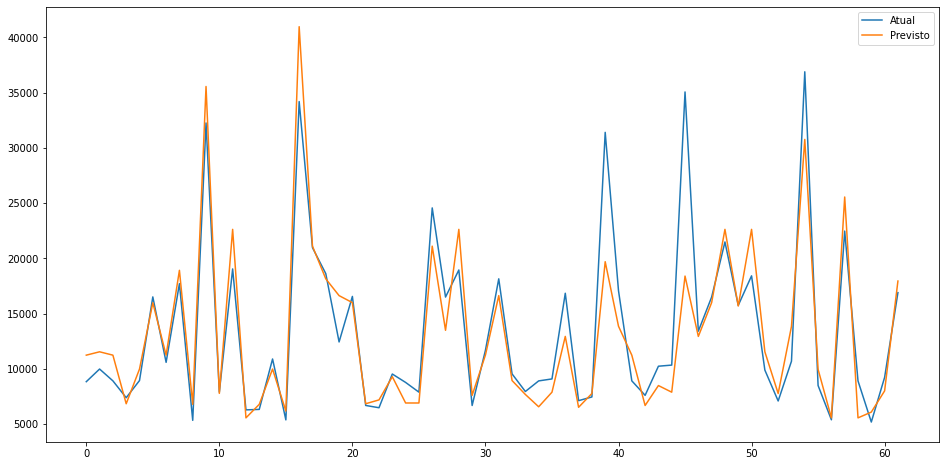

In [33]:
# Geração do modelo
modelo = KNeighborsRegressor(n_neighbors=1)
resultados['KNeighborsRegressor1'] = avaliar_modelo(modelo)
modelos['KNeighborsRegressor1'] = modelo

## Modelo 8: KNeighborsRegressor (k=3)

TREINO: 
R2....: 94.2%
MSE...: 3751151.2363135624

TESTE: 
R2....: 83.2%
MSE...: 10233408.759408602


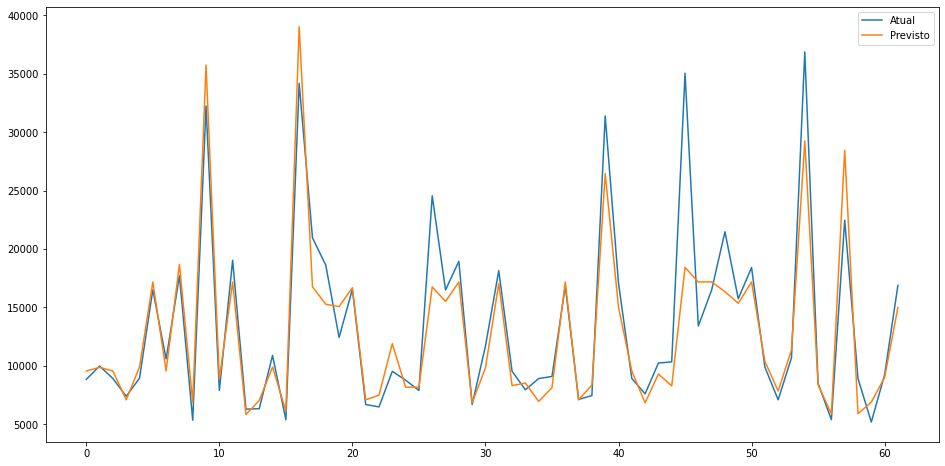

In [34]:
# Geração do modelo
modelo = KNeighborsRegressor(n_neighbors=3)
resultados['KNeighborsRegressor3'] = avaliar_modelo(modelo)
modelos['KNeighborsRegressor3'] = modelo

## Modelo 9: KNeighborsRegressor (k=5)

TREINO: 
R2....: 87.4%
MSE...: 8122804.327687863

TESTE: 
R2....: 83.2%
MSE...: 10222583.547256704


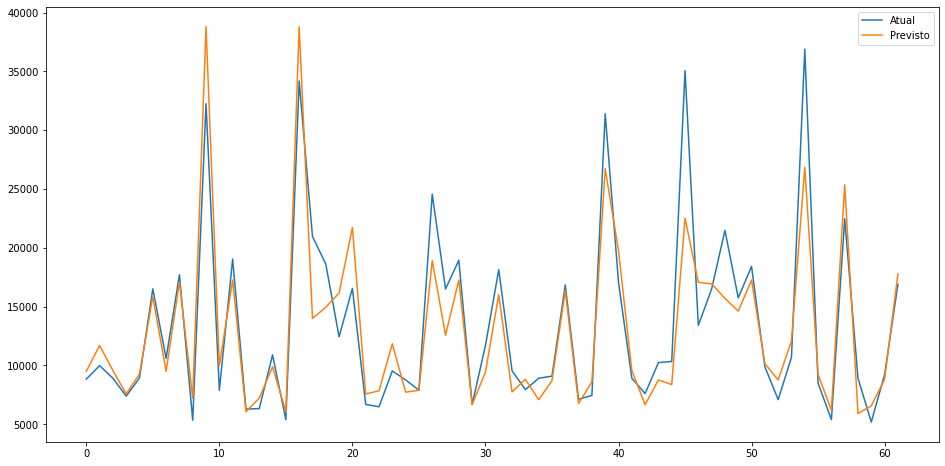

In [35]:
# Geração do modelo
modelo = KNeighborsRegressor(n_neighbors=5)
resultados['KNeighborsRegressor5'] = avaliar_modelo(modelo)
modelos['KNeighborsRegressor5'] = modelo

## Modelo 10: KNeighborsRegressor (k=7)

TREINO: 
R2....: 79.9%
MSE...: 13021190.883607458

TESTE: 
R2....: 85.5%
MSE...: 8849396.9534048


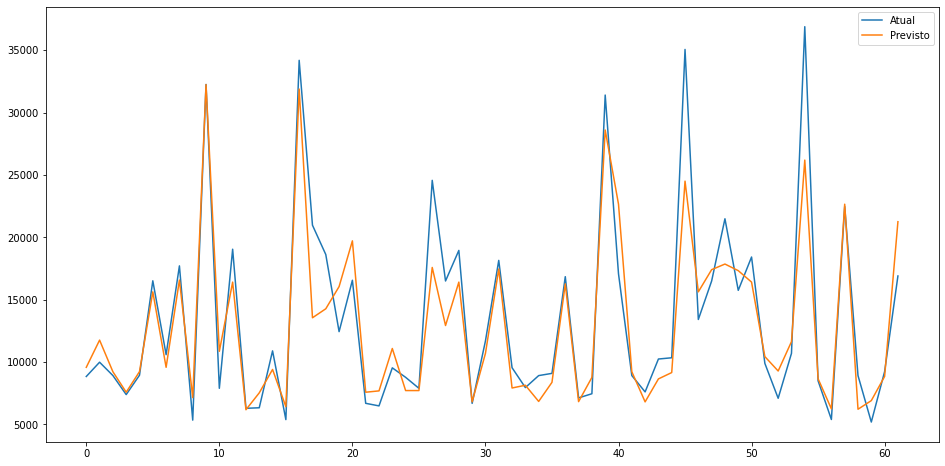

In [36]:
# Geração do modelo
modelo = KNeighborsRegressor(n_neighbors=7)
resultados['KNeighborsRegressor7'] = avaliar_modelo(modelo)
modelos['KNeighborsRegressor7'] = modelo

## Modelo 11: MLPRegressor (3 camadas)

TREINO: 
R2....: 86.2%
MSE...: 8947742.944208115

TESTE: 
R2....: 89.9%
MSE...: 6174208.970530441


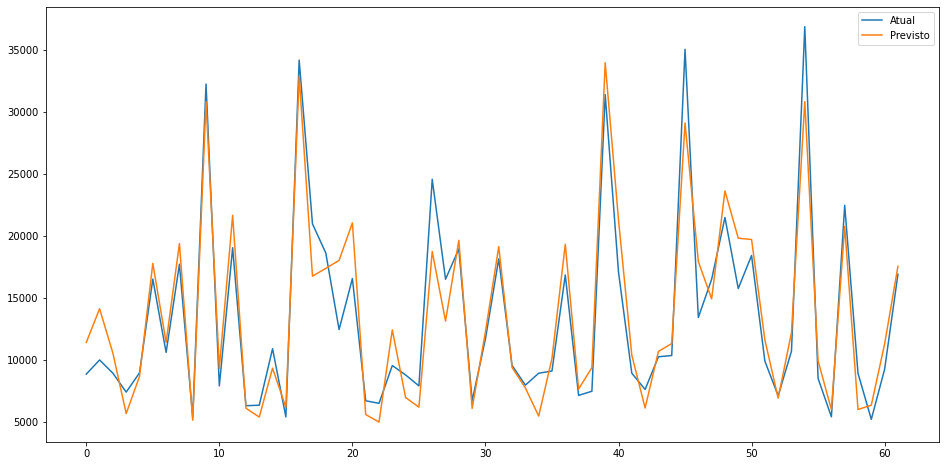

In [37]:
# Geração do modelo
modelo = MLPRegressor(hidden_layer_sizes=(100,100,100))
resultados['MLPRegressor3'] = avaliar_modelo(modelo)
modelos['MLPRegressor3'] = modelo

## Modelo 12: MLPRegressor (4 camadas)

TREINO: 
R2....: 97.7%
MSE...: 1497255.3376058878

TESTE: 
R2....: 95.2%
MSE...: 2906878.3214577534


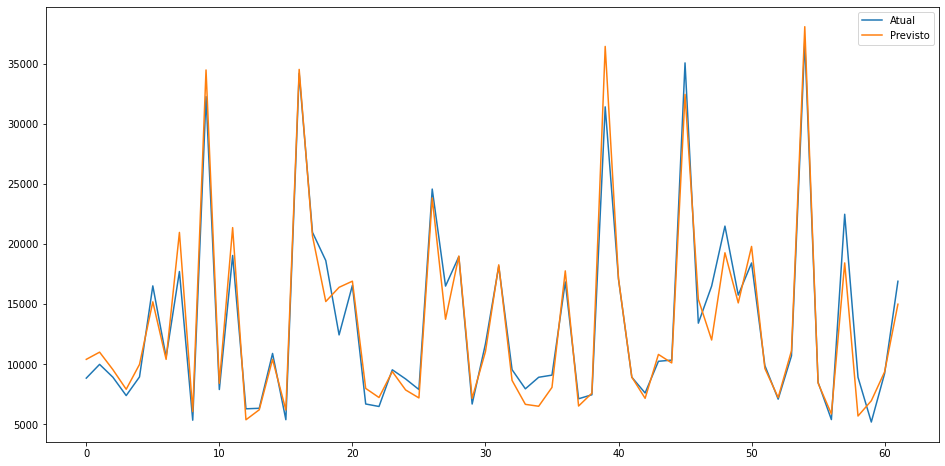

In [38]:
# Geração do modelo
modelo = MLPRegressor(hidden_layer_sizes=(500,500,500,500))
resultados['MLPRegressor4'] = avaliar_modelo(modelo)
modelos['MLPRegressor4'] = modelo

## Modelo 13: MLPRegressor (5 camadas)

TREINO: 
R2....: 99.2%
MSE...: 548758.2960635653

TESTE: 
R2....: 94.2%
MSE...: 3557698.171515094


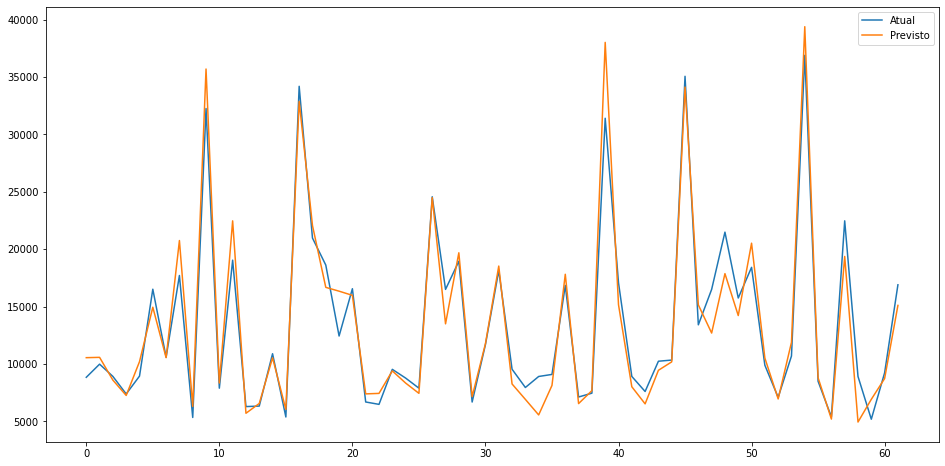

In [39]:
# Geração do modelo
modelo = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000,1000))
resultados['MLPRegressor5'] = avaliar_modelo(modelo)
modelos['MLPRegressor5'] = modelo

# 📕 Análise dos resultados

In [40]:
print(f'| {"MODELO":^20} | {"R2 TREINO":^10} | {"R2 TESTE":^10} |')
print(f'|-{"-"*20}-|-{"-"*10}-|-{"-"*10}-|')

tabela = [(m, r[0], r[2]) for m, r in resultados.items()]
tabela.sort(key=lambda x: -x[2])

for modelo, r1, r2 in tabela:
    print(f'| {modelo:20} | {r1 * 100:9.1f}% | {r2 * 100:9.1f}% |')

|        MODELO        | R2 TREINO  |  R2 TESTE  |
|----------------------|------------|------------|
| MLPRegressor4        |      97.7% |      95.2% |
| ARDRegression        |      94.4% |      95.2% |
| LassoLarsCV          |      93.5% |      95.1% |
| LassoCV              |      93.6% |      94.8% |
| Lasso                |      95.9% |      94.6% |
| LassoLars            |      95.9% |      94.3% |
| LinearRegression     |      95.9% |      94.3% |
| MLPRegressor5        |      99.2% |      94.2% |
| MLPRegressor3        |      86.2% |      89.9% |
| KNeighborsRegressor7 |      79.9% |      85.5% |
| KNeighborsRegressor5 |      87.4% |      83.2% |
| KNeighborsRegressor3 |      94.2% |      83.2% |
| KNeighborsRegressor1 |     100.0% |      81.1% |


# 📕 Discussão dos resultados

Com base nos resultados, é possível observar que os dois melhores modelos foram obtidos usando o classificador MLP e ARD. O classificador `MLPRegressor4` foi definido usando 4 camadas com 500 neurônios em cada uma delas e obteve um score R2 de 95,2%. No entanto, na base de treino é possível observar que o score R2 foi de 97,0% o que pode indicar que este modelo pode sofrer de *overfitting*. Por outro lado, o classificador `ARDRegression` obteve também um score R2 de 95,2% na base de teste e um desempenho de 94,4% na base de treino. Isso mostra que o classificador conseguir generalizar bem os casos do treino.

Os demais classificadores obtiveram um score R2 na faixa dos 90%, exceto pelos classificadores K-NN que ficaram abaixo dos 90%. O pior classificador for o K-NN com k=1, que conseguiu score R2 de 100%, porém 81,1% na base de teste, indicando assim *overfitting*.

# 📝 Aplicação do modelo


Para simplificação do teste, os dados fornecidos pelo usuário já são inseridos no DataFrame usado na geração do modelo. 

In [41]:
# Carrega os dados informados pelo usuário
df_usuario = pd.DataFrame({
    'fueltypes_diesel': [0], 
    'fueltypes_gas': [1], 
    
    'aspiration_std': [0],
    'aspiration_turbo': [1], 
    
    'carbody_convertible': [1], 
    'carbody_hardtop': [0],
    'carbody_hatchback': [0], 
    'carbody_sedan': [0], 
    'carbody_wagon': [0],
    
    'drivewheels_4wd': [1], 
    'drivewheels_fwd': [0], 
    'drivewheels_rwd': [0],
       
    'enginelocation_front': [1], 
    'enginelocation_rear': [0], 
    'enginetype_dohc': [0],
    'enginetype_dohcv': [0], 
    'enginetype_l': [0], 
    'enginetype_ohc': [0], 
    'enginetype_ohcf': [0],
    'enginetype_ohcv': [0], 
    'enginetype_rotor': [0], 
    
    'fuelsystem_1bbl': [0],
    'fuelsystem_2bbl': [1], 
    'fuelsystem_4bbl': [0], 
    'fuelsystem_idi': [0],
    'fuelsystem_mfi': [0], 
    'fuelsystem_mpfi': [0], 
    'fuelsystem_spdi': [0],
    'fuelsystem_spfi': [0], 
    
    'marca_alfa-romero': [1], 
    'marca_audi': [0], 
    'marca_bmw': [0],
    'marca_buick': [0], 
    'marca_chevrolet': [0], 
    'marca_dodge': [0], 
    'marca_honda': [0],
    'marca_isuzu': [0],
    'marca_jaguar': [0], 
    'marca_mazda': [0], 
    'marca_mercury': [0],
    'marca_mitsubishi': [0], 
    'marca_nissan': [0], 
    'marca_peugeot': [0], 
    'marca_plymouth': [0],   
    'marca_porsche': [0], 
    'marca_renault': [0], 
    'marca_saab': [0], 
    'marca_subaru': [0],
    'marca_toyota' : [0], 
    'marca_volkswagen': [0], 
    'marca_volvo': [0], 
    
    'doornumbers': [2],
    'wheelbase': [90], 
    'carlength': [171], 
    'carwidth': [64], 
    'carheight': [49], 
    'curbweight': [2600],
    'cylindernumber': [4], 
    'enginesize': [130], 
    'boreratio': [3.5], 
    'stroke': [3],
    'compressionratio': [9], 
    'horsepower': [20], 
    'peakrpm': [5000], 
    'citympg': [20], 
    'highwaympg': [30],
})

Após a captura dos dados, as variáveis numéricas precisam ser normalizadas usando os mesmos parâmetros usados para a geração do modelo.

In [42]:
# Normalizamos os atributos numéricos
colunas = ['doornumbers', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
           'cylindernumber', 'enginesize','boreratio', 'stroke', 'compressionratio',
           'horsepower' ,'peakrpm', 'citympg' ,'highwaympg']

aux = df_usuario[colunas].copy()
aux = pd.DataFrame(scaler.transform(aux), columns=aux.columns)

# Substituímos os valores normalizados no dataframe original
df_usuario.drop(labels=aux.columns, axis=1, inplace=True)
df_usuario[aux.columns] = aux

df_usuario.head()

,fueltypes_diesel,fueltypes_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheels_4wd,drivewheels_fwd,drivewheels_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,marca_alfa-romero,marca_audi,marca_bmw,marca_buick,marca_chevrolet,marca_dodge,marca_honda,marca_isuzu,marca_jaguar,marca_mazda,marca_mercury,marca_mitsubishi,marca_nissan,marca_peugeot,marca_plymouth,marca_porsche,marca_renault,marca_saab,marca_subaru,marca_toyota,marca_volkswagen,marca_volvo,doornumbers,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.130388,-1.457713,-0.247764,-0.891512,-1.938368,0.085548,-0.352887,0.074449,0.630108,-0.816461,-0.288349,-2.132375,-0.26296,-0.799782,-0.109354


Aplicamos a predição para todos os modelos obtidos.

In [43]:
for m, _, r2_teste in tabela:
    y_pred = modelos[m].predict(df_usuario)

    print(f'| {m:20} | R$ {y_pred[0]:9.2f} | {r2_teste * 100:9.1f}% |')

| MLPRegressor4        | R$  10660.33 |      95.2% |
| ARDRegression        | R$  14193.00 |      95.2% |
| LassoLarsCV          | R$  10461.35 |      95.1% |
| LassoCV              | R$  10613.83 |      94.8% |
| Lasso                | R$  20583.50 |      94.6% |
| LassoLars            | R$  20870.62 |      94.3% |
| LinearRegression     | R$  23694.29 |      94.3% |
| MLPRegressor5        | R$  11361.97 |      94.2% |
| MLPRegressor3        | R$   8657.08 |      89.9% |
| KNeighborsRegressor7 | R$   9690.14 |      85.5% |
| KNeighborsRegressor5 | R$  10163.80 |      83.2% |
| KNeighborsRegressor3 | R$  10927.00 |      83.2% |
| KNeighborsRegressor1 | R$  13495.00 |      81.1% |
